In [25]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%cd '/content/drive/MyDrive/Pairs Trading 2024-2025 Project E.Dickson, V.Uriostegui/Pairs-Trading-Repo-ED-VU-Fall-24-'

/content/drive/MyDrive/Pairs Trading 2024-2025 Project E.Dickson, V.Uriostegui/Pairs-Trading-Repo-ED-VU-Fall-24-


In [28]:
#Set start date variable as start date for historical data (9/20/23)
start_date = dt.datetime(2023, 9, 20)
#Set end date variable as end date for historical data (9/20/24)
end_date = dt.datetime(2024, 9, 19)

In [47]:
#List of tickers for stocks to be compared (Auto Makers):
#stocks_df = yf.download('TSLA', 'BMWKY', 'FUJHY', 'DRPRY', 'HMC', 'KS', 'MZDAY', 'TM', 'HYMTF')
#symbols = ['TSLA', 'BMWKY', 'FUJHY', 'DRPRY', 'HMC', 'KS', 'MZDAY', 'TM', 'HYMTF', 'CHPT', 'EVGO', 'BLNK', 'WBX', 'SPWRQ']
stocks = ['TSLA', 'BMWKY', 'FUJHY', 'DRPRY', 'HMC', 'KS', 'MZDAY', 'TM', 'HYMTF']

# Download stock data
stocks_df = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)
stocks_df.drop(columns = ['Open', 'High', 'Low','Close', 'Volume'], axis = 1, inplace = True)
stocks_df.head(5)

[*********************100%***********************]  9 of 9 completed


Price       Adj Close                                                      \
Ticker          BMWKY     DRPRY  FUJHY        HMC      HYMTF     KS MZDAY   
Date                                                                        
2023-09-20  33.342468  9.687654  10.16  35.519745  37.490711  0.035  6.08   
2023-09-21  33.106934  9.542340   9.97  34.644779  36.035679  0.035  5.97   
2023-09-22  33.012718  9.484214  10.02  34.634945  36.035679  0.030  6.05   
2023-09-25  32.532223  9.522964   9.88  34.615284  37.471813  0.035  6.00   
2023-09-26  31.900990  9.183896   9.81  34.143391  37.018299  0.030  5.96   

Price                               
Ticker              TM        TSLA  
Date                                
2023-09-20  188.750000  262.589996  
2023-09-21  186.300003  255.699997  
2023-09-22  187.100006  244.880005  
2023-09-25  184.839996  246.990005  
2023-09-26  180.500000  244.119995

In [49]:
#List of tickers for stocks to be compared (EV Charging Companies):
#symbols.extend(['CHPT', 'EVGO', 'BLNK', 'WBX', 'SPWRQ'])
tickers_df = ['CHPT', 'EVGO', 'BLNK', 'WBX', 'SPWRQ']

# Download stock data
tickers_df = yf.download(tickers_df, start=start_date, end=end_date, auto_adjust=False)
tickers_df.drop(columns = ['Open', 'High', 'Low','Close', 'Volume'], axis = 1, inplace = True)
tickers_df.head(5)
#tickers_df.head(5)

[*********************100%***********************]  5 of 5 completed


Price      Adj Close                        
Ticker          BLNK  CHPT  EVGO SPWRQ   WBX
Date                                        
2023-09-20      3.49  5.18  3.80  6.84  2.47
2023-09-21      3.14  5.09  3.65  6.62  2.27
2023-09-22      3.14  5.02  3.59  6.37  2.17
2023-09-25      2.95  4.92  3.52  6.10  2.34
2023-09-26      2.93  4.85  3.32  6.08  2.33

In [52]:
#Merge all stock frames along the first axis to prep data for correlation heat matrix
#tocks_df = pd.concat(frames, axis = 1, keys = symbols)
#stocks_df = stocks_df.set_index('Date')
#display(stocks_df.head(5))

In [57]:
# Create a correlation matrix using panda's corr() method with the Pearson correlation method
correlation_matrix = stocks_df.corr(method='pearson')
display(correlation_matrix.head(5))

#correlation_matrix.columns


Price            Adj Close                                                    \
Ticker               BMWKY     DRPRY     FUJHY       HMC     HYMTF        KS   
Price     Ticker                                                               
Adj Close BMWKY   1.000000  0.631267  0.694368  0.681120  0.002267  0.661476   
          DRPRY   0.631267  1.000000  0.275337  0.588564 -0.429766  0.465526   
          FUJHY   0.694368  0.275337  1.000000  0.802309  0.431673  0.369403   
          HMC     0.681120  0.588564  0.802309  1.000000  0.228785  0.270014   
          HYMTF   0.002267 -0.429766  0.431673  0.228785  1.000000 -0.166198   

Price                                           
Ticker               MZDAY        TM      TSLA  
Price     Ticker                                
Adj Close BMWKY   0.711786  0.789533 -0.382276  
          DRPRY   0.693794  0.414097 -0.105639  
          FUJHY   0.485540  0.905871 -0.617797  
          HMC     0.588994  0.842074 -0.542369  
          HYMTF  -0.480193  0.415741 -0.450905

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

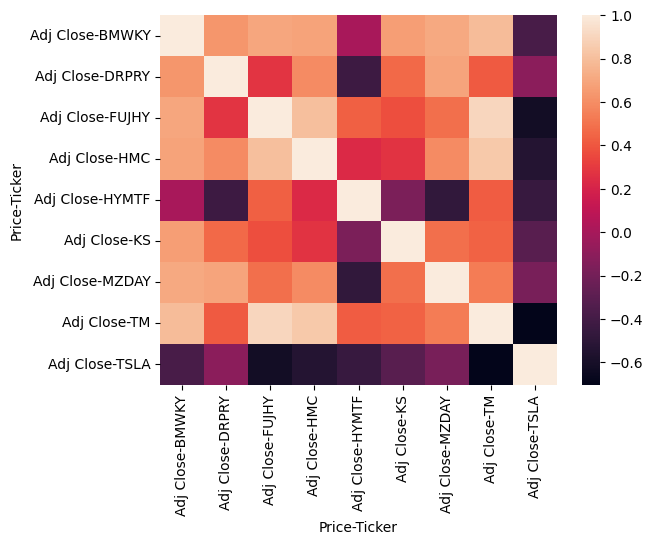

In [53]:
display(sns.heatmap(stocks_df.corr(method='pearson')))

In [54]:
# Iterate through the columns and replace the diagonal values (correlation = 1) with 0 in order to get the actual max correlation values
np.fill_diagonal(correlation_matrix.values, 0)

display(correlation_matrix.head(12))

Price            Adj Close                                                    \
Ticker               BMWKY     DRPRY     FUJHY       HMC     HYMTF        KS   
Price     Ticker                                                               
Adj Close BMWKY   0.000000  0.631267  0.694368  0.681120  0.002267  0.661476   
          DRPRY   0.631267  0.000000  0.275337  0.588564 -0.429766  0.465526   
          FUJHY   0.694368  0.275337  0.000000  0.802309  0.431673  0.369403   
          HMC     0.681120  0.588564  0.802309  0.000000  0.228785  0.270014   
          HYMTF   0.002267 -0.429766  0.431673  0.228785  0.000000 -0.166198   
          KS      0.661476  0.465526  0.369403  0.270014 -0.166198  0.000000   
          MZDAY   0.711786  0.693794  0.485540  0.588994 -0.480193  0.481994   
          TM      0.789533  0.414097  0.905871  0.842074  0.415741  0.438802   
          TSLA   -0.382276 -0.105639 -0.617797 -0.542369 -0.450905 -0.312699   

Price                                           
Ticker               MZDAY        TM      TSLA  
Price     Ticker                                
Adj Close BMWKY   0.711786  0.789533 -0.382276  
          DRPRY   0.693794  0.414097 -0.105639  
          FUJHY   0.485540  0.905871 -0.617797  
          HMC     0.588994  0.842074 -0.542369  
          HYMTF  -0.480193  0.415741 -0.450905  
          KS      0.481994  0.438802 -0.312699  
          MZDAY   0.000000  0.529647 -0.183333  
          TM      0.529647  0.000000 -0.703099  
          TSLA   -0.183333 -0.703099  0.000000

In [55]:
# Get the max correlation values of each column using a dictionary to track them

#max_corr = {}


max_vals = correlation_matrix.max()
print(len(max_vals))
print(max_vals.iloc[0])
max_vals_position = correlation_matrix.idxmax()
print(max_vals_position.iloc[0])
#print("Current max correlation values and position of each column:\n")
#print(f"{max_vals} {max_val_position}")

9
0.7895328796569845
('Adj Close', 'TM')


In [61]:
ls

pairs_trading.ipynb  README.md


In [65]:
!git init
!git remote add origin https://github.com/your-username/repo-name.git
!git add .
!git commit -m "Cleaned up ticker and stock data frame, fixed issue where ADJ CLosed priced was not seen"
!git config --global user.email "uriosteguiv06@csu.fullerton.edu"
!git config --global user.name "V.Uriostegui"
!git push -u origin main

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@516a3db351da.(none)')
fatal: could not read Username for 'https://github.com': No such device or address
